## X.3. Text
Esta es la variable más compleja. Analizaremos los textos de los tweets desde distintas perspectivas: cantidad de caracteres, cantidad de palabras, y luego separaremos los textos en palabras individuales para buscar correlaciones entre ellas y con otras variables.

In [6]:
# Añadimos la variable 'caracteres' para registrar la cantidad de ellos en cada tweet.
train['caracteres'] = train['text'].str.len()
train.sort_values(by='caracteres', inplace=True)
#
test['caracteres'] = test['text'].str.len()
test.sort_values(by='caracteres', inplace=True)

# Añadimos la columna 'palabras' para indicar la longitud en cantidad de ellas de cada tweet.
train_split = train['text'].str.split()
test_split = test['text'].str.split()

# chequeo: train.sort_values(by='largo')
train['palabras'] = [len(x) for x in train_split]
test['palabras'] = [len(x) for x in test_split]

In [196]:
train #.drop('palbras', axis=1, inplace=True)

,id,keyword,location,text,target,caracteres,palabras
4890,6962,massacre,NaN,Bad day,0,7,2
5115,7295,nuclear%20reactor,NaN,Err:509,0,7,1
1882,2703,crushed,NaN,Crushed,0,7,1
24,36,NaN,NaN,LOOOOOOL,0,8,1
3670,5224,fatality,Rafael castillo,fatality,0,8,1
...,...,...,...,...,...,...,...
633,915,bioterrorism,NaN,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22
635,919,bioterrorism,NaN,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22
614,885,bioterrorism,NaN,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151,22
4801,6833,loud%20bang,london essex england uk,It's was about 2:30 in the morning&amp;I went ...,0,152,23


In [190]:
test

,id,keyword,location,text,caracteres,palabras
780,2577,crash,PPCC,Crash,5,1
1824,6168,hijack,#HDYNATION,hijack,6,1
14,45,NaN,NaN,Awesome!,8,1
1242,4074,displaced,NaN,Displaced,9,1
9,29,NaN,NaN,Fuck off!,9,2
...,...,...,...,...,...,...
46,150,aftershock,"Vault 101, Fallout",Schoolboy ÛÒ Aftershock (Original Mix)\nExcis...,149,20
272,889,bioterrorism,NaN,@USCOURT If 90BLKs&amp;8WHTs colluded 2 take W...,150,22
534,1746,buildings%20burning,Rochester NY,3 rules for a long life. #1ÛÒDonÛªt go in b...,151,22
283,918,bioterrorism,NaN,@GACourts If 90BLKs&amp;8WHTs colluded 2 take ...,151,22


In [197]:
train.describe(include='all')

,id,keyword,location,text,target,caracteres,palabras
count,7613.000000,7552,5080,7613,7613.00000,7613.000000,7613.000000
unique,NaN,221,3341,7503,NaN,NaN,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN,NaN,NaN
freq,NaN,45,104,10,NaN,NaN,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966,101.037436,14.903586
std,3137.116090,NaN,NaN,NaN,0.49506,33.781325,5.732604
min,1.000000,NaN,NaN,NaN,0.00000,7.000000,1.000000
25%,2734.000000,NaN,NaN,NaN,0.00000,78.000000,11.000000
50%,5408.000000,NaN,NaN,NaN,0.00000,107.000000,15.000000
75%,8146.000000,NaN,NaN,NaN,1.00000,133.000000,19.000000


In [198]:
test.describe(include='all')

,id,keyword,location,text,caracteres,palabras
count,3263.000000,3237,2158,3263,3263.000000,3263.000000
unique,NaN,221,1602,3243,NaN,NaN
top,NaN,deluged,New York,11-Year-Old Boy Charged With Manslaughter of T...,NaN,NaN
freq,NaN,23,38,3,NaN,NaN
mean,5427.152927,NaN,NaN,NaN,102.108183,14.965369
std,3146.427221,NaN,NaN,NaN,33.972158,5.783576
min,0.000000,NaN,NaN,NaN,5.000000,1.000000
25%,2683.000000,NaN,NaN,NaN,78.000000,11.000000
50%,5500.000000,NaN,NaN,NaN,109.000000,15.000000
75%,8176.000000,NaN,NaN,NaN,134.000000,19.000000


# Distribución de largo (caracteres)
En las tablas se puede observar que los estadísticos para la cantidad de caracteres y de palabras son similares en ambos grupos (train y test). Para analizarlo más en detalle, graficamos las distribuciones, comenzando con caracteres.

In [74]:
# Concatenos para plotear con sns
train_drop = train.drop('target', axis=1)
todo = pd.concat([train_drop, test], keys=['train', 'test'])
todo.reset_index(inplace=True)

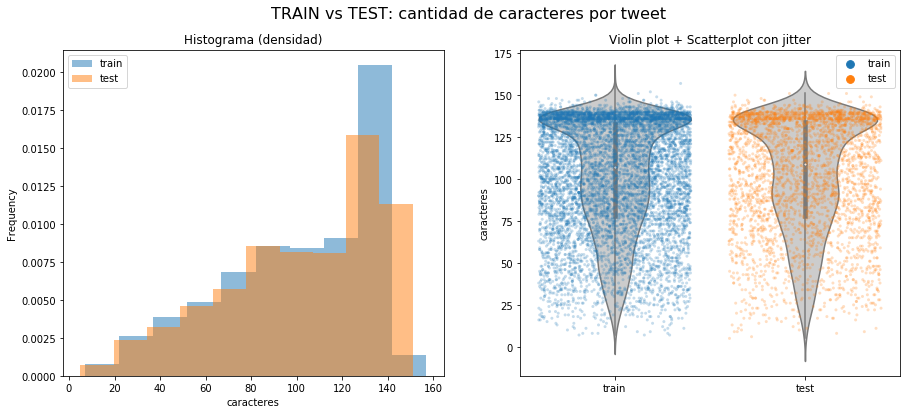

In [88]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
train['caracteres'].plot(
    kind='hist', density=True, ax=ax1, alpha=0.5)# xlim=(0, 160), ), legend='train'
test['caracteres'].plot(
    kind='hist', density=True, title='Histograma (densidad)', figsize=(15,6), ax=ax1, alpha=0.5)# xlim=(0, 160), ), legend='test'
ax1.legend(['train', 'test'])
ax1.set_xlabel('caracteres')

ax2 = fig.add_subplot(122)
sns.violinplot(x='level_0', y="caracteres", data=todo, ax=ax2, color=".8", figsize=(15,6)) #,inner=None,)
sns.stripplot(x='level_0', y="caracteres", data=todo, hue='level_0', ax=ax2, alpha=0.25, jitter=.4, size=3)
ax2.legend()
ax2.set_ylabel('caracteres')
ax2.set_xlabel(None)
ax2.set_title('Violin plot + Scatterplot con jitter')

fig.suptitle('TRAIN vs TEST: cantidad de caracteres por tweet', fontsize=16);

Efectivamente, la distribuciones de largo de caracteres son muy similares. Además, los valores tienden a concentrarse cerca de 140, como si los ususario quisieran aprovechar el límite histórico de caracteres de twitter. Ahora realizaremos el mismo tipo de análisis con el largo en palabras.
# Distribución de largo (palabras)





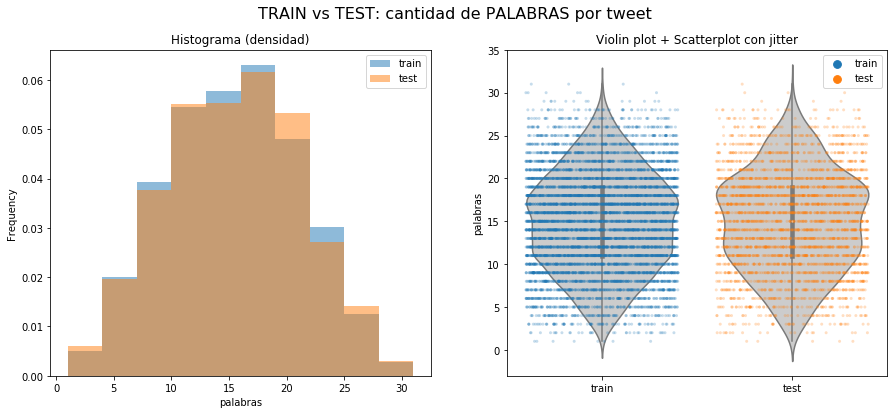

In [89]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
train['palabras'].plot(
    kind='hist', density=True, ax=ax1, alpha=0.5)# xlim=(0, 160), ), legend='train'
test['palabras'].plot(
    kind='hist', density=True, title='Histograma (densidad)', figsize=(15,6), ax=ax1, alpha=0.5)# xlim=(0, 160), ), legend='test'
ax1.legend(['train', 'test'])
ax1.set_xlabel('palabras')

ax2 = fig.add_subplot(122)
sns.violinplot(x='level_0', y="palabras", data=todo, ax=ax2, color=".8", figsize=(15,6)) #,inner=None,)
sns.stripplot(x='level_0', y="palabras", data=todo, hue='level_0', ax=ax2, alpha=0.25, jitter=.4, size=3)
ax2.legend()
ax2.set_ylabel('palabras')
ax2.set_xlabel(None)
ax2.set_title('Violin plot + Scatterplot con jitter')

fig.suptitle('TRAIN vs TEST: cantidad de PALABRASAdemás por tweet', fontsize=16);

En el caso de las palabras, las distribuciónes también son similares, se asemejan más a un normal, y se evidencia en el scatter-jitter el carácter discreto de la variable.

## 3.1. Distribución de palabras dentro de text
Separaremos el texto de cada tweets en las palabras que lo componen, para analizar con qué frecuenca se utiliza cada palabra.

In [102]:
train['split'] = train['text'].str.split()
train

,id,keyword,location,text,target,caracteres,palabras,split
4890,6962,massacre,NaN,Bad day,0,7,2,"[Bad, day]"
5115,7295,nuclear%20reactor,NaN,Err:509,0,7,1,[Err:509]
1882,2703,crushed,NaN,Crushed,0,7,1,[Crushed]
24,36,NaN,NaN,LOOOOOOL,0,8,1,[LOOOOOOL]
3670,5224,fatality,Rafael castillo,fatality,0,8,1,[fatality]
...,...,...,...,...,...,...,...,...
633,915,bioterrorism,NaN,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22,"[@HowardU, If, 90BLKs&amp;8WHTs, colluded, 2, ..."
635,919,bioterrorism,NaN,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22,"[@cspanwj, If, 90BLKs&amp;8WHTs, colluded, 2, ..."
614,885,bioterrorism,NaN,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151,22,"[@CAgov, If, 90BLKs&amp;8WHTs, colluded, 2, ta..."
4801,6833,loud%20bang,london essex england uk,It's was about 2:30 in the morning&amp;I went ...,0,152,23,"[It's, was, about, 2:30, in, the, morning&amp;..."


In [110]:
# Me da error por NaNs, los reemplazo por ''
train1 = train.fillna('')
train1

,id,keyword,location,text,target,caracteres,palabras,split
4890,6962,massacre,,Bad day,0,7,2,"[Bad, day]"
5115,7295,nuclear%20reactor,,Err:509,0,7,1,[Err:509]
1882,2703,crushed,,Crushed,0,7,1,[Crushed]
24,36,,,LOOOOOOL,0,8,1,[LOOOOOOL]
3670,5224,fatality,Rafael castillo,fatality,0,8,1,[fatality]
...,...,...,...,...,...,...,...,...
633,915,bioterrorism,,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22,"[@HowardU, If, 90BLKs&amp;8WHTs, colluded, 2, ..."
635,919,bioterrorism,,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22,"[@cspanwj, If, 90BLKs&amp;8WHTs, colluded, 2, ..."
614,885,bioterrorism,,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151,22,"[@CAgov, If, 90BLKs&amp;8WHTs, colluded, 2, ta..."
4801,6833,loud%20bang,london essex england uk,It's was about 2:30 in the morning&amp;I went ...,0,152,23,"[It's, was, about, 2:30, in, the, morning&amp;..."


In [ ]:
# armo datafame con id de tweet y palabras separadas
train1_split = pd.DataFrame(columns=['id', 'palabra'])

for z in train1.index:
    train1_split = train1_split.append(pd.DataFrame({'id': [train1.loc[z, 'id']] * len(train1.loc[z, 'split']),
                                      'palabra': train1.loc[z, 'split']}))

In [156]:
train1_split

,id,palabra
0,6962,Bad
1,6962,day
0,7295,Err:509
0,2703,Crushed
0,36,LOOOOOOL
...,...,...
16,1832,GTFO
17,1832,or
18,1832,you
19,1832,get


In [157]:
# Creamos dataframe con los las frecuencias de las palabras
palabras_histos = train1_split['palabra'].value_counts()
palabras_histos

the                       2575
a                         1845
to                        1805
in                        1757
of                        1722
                          ... 
Granted                      1
solved:                      1
http://t.co/JvjALYg2n1       1
??that's                     1
greeting                     1
Name: palabra, Length: 31924, dtype: int64

Son más de 30000 palabras, y desde ya preposiciones, artículos, pronombres, conjunciones y algunos verbos de uso corriente se encuentran entre las más usadas. son las más comunes. 

In [167]:
palabras_histos.head(60)

the       2575
a         1845
to        1805
in        1757
of        1722
and       1302
I         1197
for        820
is         814
on         773
-          763
you        632
The        552
my         549
with       508
that       492
at         485
by         469
it         433
from       372
be         371
was        363
have       353
are        345
this       335
like       318
&amp;      295
A          290
as         282
just       258
your       254
but        250
up         250
me         244
so         239
not        236
has        229
out        226
I'm        225
??         214
will       210
via        208
after      206
an         204
about      192
been       185
get        183
when       181
or         181
no         178
all        178
into       162
over       158
In         155
who        150
we         149
fire       148
...        147
people     146
2          145
Name: palabra, dtype: int64

Recién al final del top 60 encnotramos una palabra que pueda estar relacionada directamente con un evento poco feliz. Es necesario hacer una limpieza de los términos más comunes y poco específicos, cosa que dejaremos para el TP 2.
### Cuántas palabras aparecen x cantidad de veces?

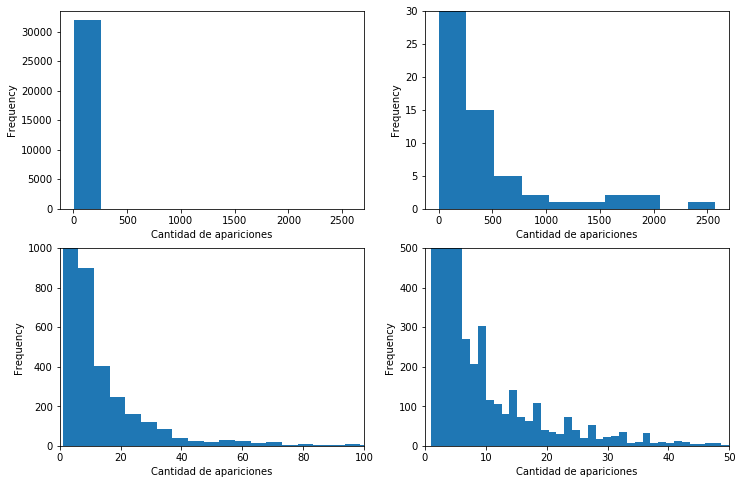

In [203]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
palabras_histos.plot(kind='hist', figsize=(12,8))#, ylim=(0,50))#bins=500)#, xlim=(0,100), ylim=(0,50))#, x_label='Cantidad de apariciones')
plt.xlabel('Cantidad de apariciones')

ax2 = fig.add_subplot(222)
palabras_histos.plot(kind='hist', ylim=(0,30))#bins=500)#, xlim=(0,100), ylim=(0,50))#, x_label='Cantidad de apariciones')
plt.xlabel('Cantidad de apariciones');

ax3 = fig.add_subplot(223)
palabras_histos.plot(kind='hist', bins=500, xlim=(0,100), ylim=(0,1000))#, x_label='Cantidad de apariciones')
plt.xlabel('Cantidad de apariciones');

ax4 = fig.add_subplot(224)
palabras_histos.plot(kind='hist', bins=2000, xlim=(0,50), ylim=(0,500))#, x_label='Cantidad de apariciones')
plt.xlabel('Cantidad de apariciones');

En la FIgura anterior observamos, con distintos grados amplificación y definición de intervalos, una caída similar a una exponencial negativa en el uso de los términos: poco términos muy usados, muchos términos muy poco utilizados. Llaman la atención lo máximos locales en el gráfico de abajo a la derecha. Esto merece un análisis más detallado, tal vez comparando el uso de palabras en textos tomados al azar con el uso que se le da en estos tweets.
Sería interesante analizar la correlación de a pares en el uso de palabras, pero una matriz de tales dimensiones es difícil de visualizar y analizar, sin antes hacer un filtrado de términos comunes poco específicos.